# Mokhamad Diki Armanda
# 20108020001
# 7B2 Text Mining

# Import Library

In [26]:
# Import library yang dibutuhkan

import pandas as pd
import numpy as np
import nltk
import string
import re

In [27]:
!pip3 install --upgrade pandas

# Membaca dataset

In [28]:
# Memuat dataset kedalam Dataframe menggunakan Pandas

def load_data():
    data = pd.read_csv('prastyo-sentiment_all.csv')
    return data

In [86]:
# Menambahkan nama kolom pada dataset
tweet_df = load_data()
tweet_df.columns = ['tweet', 'sentimen']

In [30]:
# Menampilkan data sebanyak 500
tweet_df

,tweet,sentimen
0,Yuks.. kawal kebijakan pemerintah jangan sampa...,pos
1,Yukk sama-sama bahu membahu membantuu pemerint...,pos
2,Yuk sahabat kita samasama menjaga jarak antar ...,pos
3,Yuk sahabat kita sama sama menjaga jarak antar...,pos
4,yuk pemerintah & penduduk Indonesia kasih wawa...,pos
...,...,...
2263,Semoga KTT luar biasa memberikan manfaat bg In...,neu
2264,"1. Corona sudah menyerang di berbagai negara, ...",neg
2265,Sudah sampai kabupaten sebelah kawan... Mari k...,pos
2266,Berharap pemerintah Indonesia segara menutup p...,neu


In [31]:
# Melihat list column di dataset

for col in tweet_df.columns:
    print(col)

tweet_df.info()

tweet
sentimen
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2268 entries, 0 to 2267
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   tweet     2268 non-null   object
 1   sentimen  2268 non-null   object
dtypes: object(2)
memory usage: 35.6+ KB


In [32]:
# Menampilkan data keseluruhan pada kolom Text

df = pd.DataFrame(tweet_df)

# Text Preprocessing

In [33]:
# --------------- Cleaning Data --------------------
# Menghapus User

def remove_pattern(Text, pattern):
    r = re.findall(pattern, str(Text))
    for i in r:
        input_txt = re.sub(i, '', str(Text))
    return Text
df['Remove_User'] = [' '.join([y for y in x.split() if not y.startswith("@")]) for x in df['tweet'].fillna("")]
df

,tweet,sentimen,Remove_User
0,Yuks.. kawal kebijakan pemerintah jangan sampa...,pos,Yuks.. kawal kebijakan pemerintah jangan sampa...
1,Yukk sama-sama bahu membahu membantuu pemerint...,pos,Yukk sama-sama bahu membahu membantuu pemerint...
2,Yuk sahabat kita samasama menjaga jarak antar ...,pos,Yuk sahabat kita samasama menjaga jarak antar ...
3,Yuk sahabat kita sama sama menjaga jarak antar...,pos,Yuk sahabat kita sama sama menjaga jarak antar...
4,yuk pemerintah & penduduk Indonesia kasih wawa...,pos,yuk pemerintah & penduduk Indonesia kasih wawa...
...,...,...,...
2263,Semoga KTT luar biasa memberikan manfaat bg In...,neu,Semoga KTT luar biasa memberikan manfaat bg In...
2264,"1. Corona sudah menyerang di berbagai negara, ...",neg,"1. Corona sudah menyerang di berbagai negara, ..."
2265,Sudah sampai kabupaten sebelah kawan... Mari k...,pos,Sudah sampai kabupaten sebelah kawan... Mari k...
2266,Berharap pemerintah Indonesia segara menutup p...,neu,Berharap pemerintah Indonesia segara menutup p...


In [34]:
#------------Cleaning Data-------------------

def remove(tweet):
    #remove angka
    tweet = re.sub(r"\d+", "", tweet)
    # tweet = re.sub('[0-9]+', '', tweet)

    # remove stock market tickers like $GE
    tweet = re.sub(r'\$\w*', '', tweet)

    # remove old style retweet text "RT"
    tweet = re.sub(r'^RT[\s]+', '', tweet)

    # remove hashtags
    # only removing the hash # sign from the word
    tweet = re.sub(r'#([A-Za-z0-9_]+)', '', tweet)

    # remove hyperlinks
    tweet = re.sub(r'https?:\/\/.*[\r\n]*', '', tweet)

    #remove coma
    tweet = re.sub(r',','',tweet)

    # remove non ASCII (emoticon, chinese word, .etc)
    tweet = tweet.encode('ascii', 'replace').decode('ascii')

    # remove tab, new line, ans back slice
    tweet = tweet.replace('\\t'," ").replace('\\n'," ").replace('\\u'," ").replace('\\',"")

    # remove hashtags
    tweet = re.sub(r'#', '', tweet)

    #remove simbol ?!^;:
    tweet = re.sub(r'[^\w\s]', '', tweet)

    #remove simbol, angka dan karakter aneh
    tweet = re.sub(r"[.,:;+!\-_<^/=?\"'\(\)\d\*]", " ", tweet)

    #remove punctuation
    tweet.translate(str.maketrans("","",string.punctuation))

    df = tweet.strip()
    return tweet

df.astype(str).apply(lambda x: x.str.encode('ascii', 'ignore').str.decode('ascii'))
df['Remove_RT'] = df['Remove_User'].apply(lambda x: remove(x))

# ------- Case Folding ---------------
df['Remove_RT'] = df['Remove_RT'].str.lower()
df

,tweet,sentimen,Remove_User,Remove_RT
0,Yuks.. kawal kebijakan pemerintah jangan sampa...,pos,Yuks.. kawal kebijakan pemerintah jangan sampa...,yuks kawal kebijakan pemerintah jangan sampai ...
1,Yukk sama-sama bahu membahu membantuu pemerint...,pos,Yukk sama-sama bahu membahu membantuu pemerint...,yukk samasama bahu membahu membantuu pemerinta...
2,Yuk sahabat kita samasama menjaga jarak antar ...,pos,Yuk sahabat kita samasama menjaga jarak antar ...,yuk sahabat kita samasama menjaga jarak antar ...
3,Yuk sahabat kita sama sama menjaga jarak antar...,pos,Yuk sahabat kita sama sama menjaga jarak antar...,yuk sahabat kita sama sama menjaga jarak antar...
4,yuk pemerintah & penduduk Indonesia kasih wawa...,pos,yuk pemerintah & penduduk Indonesia kasih wawa...,yuk pemerintah penduduk indonesia kasih wawas...
...,...,...,...,...
2263,Semoga KTT luar biasa memberikan manfaat bg In...,neu,Semoga KTT luar biasa memberikan manfaat bg In...,semoga ktt luar biasa memberikan manfaat bg in...
2264,"1. Corona sudah menyerang di berbagai negara, ...",neg,"1. Corona sudah menyerang di berbagai negara, ...",corona sudah menyerang di berbagai negara pem...
2265,Sudah sampai kabupaten sebelah kawan... Mari k...,pos,Sudah sampai kabupaten sebelah kawan... Mari k...,sudah sampai kabupaten sebelah kawan mari kita...
2266,Berharap pemerintah Indonesia segara menutup p...,neu,Berharap pemerintah Indonesia segara menutup p...,berharap pemerintah indonesia segara menutup p...


In [35]:
# Menghapus duplicate kata
df.drop_duplicates(subset ="Remove_RT", keep = 'first', inplace = True)
df

,tweet,sentimen,Remove_User,Remove_RT
0,Yuks.. kawal kebijakan pemerintah jangan sampa...,pos,Yuks.. kawal kebijakan pemerintah jangan sampa...,yuks kawal kebijakan pemerintah jangan sampai ...
1,Yukk sama-sama bahu membahu membantuu pemerint...,pos,Yukk sama-sama bahu membahu membantuu pemerint...,yukk samasama bahu membahu membantuu pemerinta...
2,Yuk sahabat kita samasama menjaga jarak antar ...,pos,Yuk sahabat kita samasama menjaga jarak antar ...,yuk sahabat kita samasama menjaga jarak antar ...
3,Yuk sahabat kita sama sama menjaga jarak antar...,pos,Yuk sahabat kita sama sama menjaga jarak antar...,yuk sahabat kita sama sama menjaga jarak antar...
4,yuk pemerintah & penduduk Indonesia kasih wawa...,pos,yuk pemerintah & penduduk Indonesia kasih wawa...,yuk pemerintah penduduk indonesia kasih wawas...
...,...,...,...,...
2255,Semoga KTT luar biasa memberikan manfaat bg In...,neu,Semoga KTT luar biasa memberikan manfaat bg In...,semoga ktt luar biasa memberikan manfaat bg in...
2256,"1. Corona sudah menyerang di berbagai negara, ...",neg,"1. Corona sudah menyerang di berbagai negara, ...",corona sudah menyerang di berbagai negara pem...
2257,Sudah sampai kabupaten sebelah kawan... Mari k...,pos,Sudah sampai kabupaten sebelah kawan... Mari k...,sudah sampai kabupaten sebelah kawan mari kita...
2258,Berharap pemerintah Indonesia segara menutup p...,neu,Berharap pemerintah Indonesia segara menutup p...,berharap pemerintah indonesia segara menutup p...


In [36]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [37]:
!pip install Sastrawi

In [38]:
# Mendefinisikan fungsi untuk tokenization

#-------Tokenizing-----------
from nltk.tokenize import TweetTokenizer

import re
def tokenization(tweet):
    tokens = re.split(r"\s+",tweet,)
    return tokens

# Menerapkan fungsi ke kolom
df['Tweet_Tokenizer']= df['Remove_RT'].apply(lambda x: tokenization(x))
df

,tweet,sentimen,Remove_User,Remove_RT,Tweet_Tokenizer
0,Yuks.. kawal kebijakan pemerintah jangan sampa...,pos,Yuks.. kawal kebijakan pemerintah jangan sampa...,yuks kawal kebijakan pemerintah jangan sampai ...,"[yuks, kawal, kebijakan, pemerintah, jangan, s..."
1,Yukk sama-sama bahu membahu membantuu pemerint...,pos,Yukk sama-sama bahu membahu membantuu pemerint...,yukk samasama bahu membahu membantuu pemerinta...,"[yukk, samasama, bahu, membahu, membantuu, pem..."
2,Yuk sahabat kita samasama menjaga jarak antar ...,pos,Yuk sahabat kita samasama menjaga jarak antar ...,yuk sahabat kita samasama menjaga jarak antar ...,"[yuk, sahabat, kita, samasama, menjaga, jarak,..."
3,Yuk sahabat kita sama sama menjaga jarak antar...,pos,Yuk sahabat kita sama sama menjaga jarak antar...,yuk sahabat kita sama sama menjaga jarak antar...,"[yuk, sahabat, kita, sama, sama, menjaga, jara..."
4,yuk pemerintah & penduduk Indonesia kasih wawa...,pos,yuk pemerintah & penduduk Indonesia kasih wawa...,yuk pemerintah penduduk indonesia kasih wawas...,"[yuk, pemerintah, penduduk, indonesia, kasih, ..."
...,...,...,...,...,...
2255,Semoga KTT luar biasa memberikan manfaat bg In...,neu,Semoga KTT luar biasa memberikan manfaat bg In...,semoga ktt luar biasa memberikan manfaat bg in...,"[semoga, ktt, luar, biasa, memberikan, manfaat..."
2256,"1. Corona sudah menyerang di berbagai negara, ...",neg,"1. Corona sudah menyerang di berbagai negara, ...",corona sudah menyerang di berbagai negara pem...,"[, corona, sudah, menyerang, di, berbagai, neg..."
2257,Sudah sampai kabupaten sebelah kawan... Mari k...,pos,Sudah sampai kabupaten sebelah kawan... Mari k...,sudah sampai kabupaten sebelah kawan mari kita...,"[sudah, sampai, kabupaten, sebelah, kawan, mar..."
2258,Berharap pemerintah Indonesia segara menutup p...,neu,Berharap pemerintah Indonesia segara menutup p...,berharap pemerintah indonesia segara menutup p...,"[berharap, pemerintah, indonesia, segara, menu..."


In [39]:
#Menghapus duplicate kata
df.drop_duplicates(subset ="tweet", keep = 'first', inplace = True)
df

,tweet,sentimen,Remove_User,Remove_RT,Tweet_Tokenizer
0,Yuks.. kawal kebijakan pemerintah jangan sampa...,pos,Yuks.. kawal kebijakan pemerintah jangan sampa...,yuks kawal kebijakan pemerintah jangan sampai ...,"[yuks, kawal, kebijakan, pemerintah, jangan, s..."
1,Yukk sama-sama bahu membahu membantuu pemerint...,pos,Yukk sama-sama bahu membahu membantuu pemerint...,yukk samasama bahu membahu membantuu pemerinta...,"[yukk, samasama, bahu, membahu, membantuu, pem..."
2,Yuk sahabat kita samasama menjaga jarak antar ...,pos,Yuk sahabat kita samasama menjaga jarak antar ...,yuk sahabat kita samasama menjaga jarak antar ...,"[yuk, sahabat, kita, samasama, menjaga, jarak,..."
3,Yuk sahabat kita sama sama menjaga jarak antar...,pos,Yuk sahabat kita sama sama menjaga jarak antar...,yuk sahabat kita sama sama menjaga jarak antar...,"[yuk, sahabat, kita, sama, sama, menjaga, jara..."
4,yuk pemerintah & penduduk Indonesia kasih wawa...,pos,yuk pemerintah & penduduk Indonesia kasih wawa...,yuk pemerintah penduduk indonesia kasih wawas...,"[yuk, pemerintah, penduduk, indonesia, kasih, ..."
...,...,...,...,...,...
2255,Semoga KTT luar biasa memberikan manfaat bg In...,neu,Semoga KTT luar biasa memberikan manfaat bg In...,semoga ktt luar biasa memberikan manfaat bg in...,"[semoga, ktt, luar, biasa, memberikan, manfaat..."
2256,"1. Corona sudah menyerang di berbagai negara, ...",neg,"1. Corona sudah menyerang di berbagai negara, ...",corona sudah menyerang di berbagai negara pem...,"[, corona, sudah, menyerang, di, berbagai, neg..."
2257,Sudah sampai kabupaten sebelah kawan... Mari k...,pos,Sudah sampai kabupaten sebelah kawan... Mari k...,sudah sampai kabupaten sebelah kawan mari kita...,"[sudah, sampai, kabupaten, sebelah, kawan, mar..."
2258,Berharap pemerintah Indonesia segara menutup p...,neu,Berharap pemerintah Indonesia segara menutup p...,berharap pemerintah indonesia segara menutup p...,"[berharap, pemerintah, indonesia, segara, menu..."


In [40]:
from nltk import FreqDist

# function to get top occuring word
def get_freq_word(input):
  text = " ".join(input)
  words = text.split()
  freq_word = FreqDist(words)
  return freq_word

# Function to sort a tuple descendingly
def sort_tuple(tup):
  tup.sort(key = lambda x: x[1], reverse=True)
  return tup

In [41]:
# Get and sort top occuring word
print("Top Social word")
freq_words_list = list(filter(lambda x: x[1]>=5, get_freq_word(df['Remove_RT']).items()))
sort_tuple(freq_words_list)

Top Social word


[('pemerintah', 1850),
 ('indonesia', 1586),
 ('covid', 1566),
 ('dan', 1088),
 ('di', 1034),
 ('yg', 924),
 ('lockdown', 810),
 ('ini', 798),
 ('yang', 633),
 ('dampak', 627),
 ('kita', 471),
 ('dari', 469),
 ('untuk', 435),
 ('bisa', 401),
 ('ada', 362),
 ('tidak', 361),
 ('itu', 338),
 ('negara', 318),
 ('rakyat', 312),
 ('virus', 311),
 ('ekonomi', 276),
 ('dengan', 260),
 ('akan', 257),
 ('corona', 239),
 ('lebih', 238),
 ('ke', 225),
 ('sudah', 225),
 ('dalam', 224),
 ('juga', 224),
 ('semua', 223),
 ('tapi', 223),
 ('ga', 223),
 ('banyak', 220),
 ('masyarakat', 219),
 ('wabah', 218),
 ('apa', 200),
 ('nya', 195),
 ('harus', 193),
 ('aja', 188),
 ('gak', 185),
 ('sama', 175),
 ('orang', 171),
 ('buat', 169),
 ('bukan', 164),
 ('penyebaran', 164),
 ('jangan', 156),
 ('kebijakan', 154),
 ('karena', 154),
 ('ya', 154),
 ('kalau', 152),
 ('mau', 150),
 ('kalo', 148),
 ('masih', 147),
 ('pusat', 144),
 ('penanganan', 144),
 ('saya', 143),
 ('utk', 138),
 ('atau', 137),
 ('mereka', 137

# Visualisasi

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

## Missing Data

<Axes: >

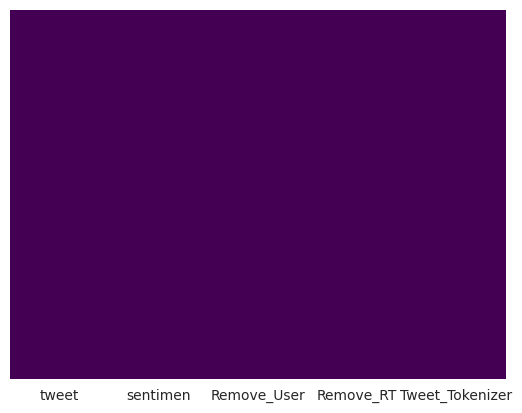

In [43]:
# cek data yang hilang
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

## Diagram Batang Sentimen Analisis

<Axes: xlabel='sentimen', ylabel='count'>

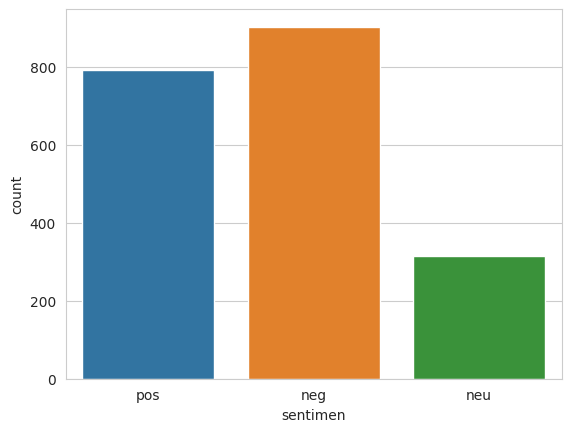

In [44]:
sns.set_style('whitegrid')
sns.countplot(x='sentimen', data=df)

In [51]:
df.head()

,tweet,sentimen,Remove_User,Remove_RT,Tweet_Tokenizer
0,Yuks.. kawal kebijakan pemerintah jangan sampa...,pos,Yuks.. kawal kebijakan pemerintah jangan sampa...,yuks kawal kebijakan pemerintah jangan sampai ...,"[yuks, kawal, kebijakan, pemerintah, jangan, s..."
1,Yukk sama-sama bahu membahu membantuu pemerint...,pos,Yukk sama-sama bahu membahu membantuu pemerint...,yukk samasama bahu membahu membantuu pemerinta...,"[yukk, samasama, bahu, membahu, membantuu, pem..."
2,Yuk sahabat kita samasama menjaga jarak antar ...,pos,Yuk sahabat kita samasama menjaga jarak antar ...,yuk sahabat kita samasama menjaga jarak antar ...,"[yuk, sahabat, kita, samasama, menjaga, jarak,..."
3,Yuk sahabat kita sama sama menjaga jarak antar...,pos,Yuk sahabat kita sama sama menjaga jarak antar...,yuk sahabat kita sama sama menjaga jarak antar...,"[yuk, sahabat, kita, sama, sama, menjaga, jara..."
4,yuk pemerintah & penduduk Indonesia kasih wawa...,pos,yuk pemerintah & penduduk Indonesia kasih wawa...,yuk pemerintah penduduk indonesia kasih wawas...,"[yuk, pemerintah, penduduk, indonesia, kasih, ..."


# Vectorizer

In [76]:
# Vectorizer menggunakan TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import RegexpTokenizer
nltk.download('stopwords')
from nltk.corpus import stopwords

token = RegexpTokenizer(r'[a-zA-Z0-9]+')
tfidfconverter = TfidfVectorizer(max_features=2000, min_df=5, max_df=0.7, stop_words=stopwords.words('english'), ngram_range=(1,3))
text_counts = tfidfconverter.fit_transform(df['Remove_RT'].values.astype('U'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Training dan Split data

In [58]:
from sklearn.model_selection import train_test_split

In [77]:
X_train, X_test, y_train, y_test = train_test_split(text_counts, df['sentimen'], test_size=0.2, random_state=1234)

##Training and Predicting

In [79]:
from sklearn.svm import SVC

# Misalnya, X_train adalah matriks fitur pelatihan dan y_train adalah vektor label pelatihan
model = SVC(kernel='linear')  # Pilih kernel sesuai kebutuhan
model.fit(X_train, y_train)

SVC(kernel='linear')

In [80]:
y_pred = model.predict(X_test)

##Evaluation
Kita dapat memeriksa presisi, recall, skor f1 menggunakan laporan klasifikasi!

In [81]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, classification_report, confusion_matrix

In [82]:
print(confusion_matrix(y_test, y_pred))

[[157   1  29]
 [ 29  17  22]
 [ 32   5 110]]


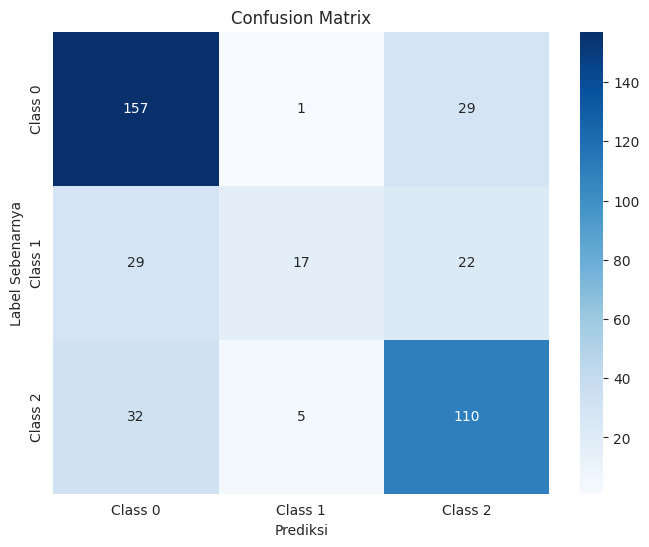

In [85]:
# Membuat confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Menampilkan confusion matrix menggunakan heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1', 'Class 2'], yticklabels=['Class 0', 'Class 1', 'Class 2'])
plt.xlabel('Prediksi')
plt.ylabel('Label Sebenarnya')
plt.title('Confusion Matrix')
plt.show()

In [83]:
print(classification_report(y_test,  y_pred))

              precision    recall  f1-score   support

         neg       0.72      0.84      0.78       187
         neu       0.74      0.25      0.37        68
         pos       0.68      0.75      0.71       147

    accuracy                           0.71       402
   macro avg       0.71      0.61      0.62       402
weighted avg       0.71      0.71      0.69       402



In [84]:
print("Accuracy  : ", accuracy_score(y_test, y_pred) * 100)
print("Recall    : ", recall_score(y_test, y_pred, average='weighted') * 100)
print("Precision : ", precision_score(y_test, y_pred, average='weighted') * 100)
print("F1        : ", f1_score(y_test, y_pred, average='weighted') * 100)

Accuracy  :  70.64676616915423
Recall    :  70.64676616915423
Precision :  70.98755325883546
F1        :  68.50480334725773
